In [44]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [13]:
nfl2021 = pd.read_csv('./2021.csv')
nfl2022 = pd.read_csv('./2022.csv')
nfl2023 = pd.read_csv('./2023.csv')

In [14]:
nfl2021.columns

Index(['Rk', 'Tm', 'G', 'PF', 'Yds', 'Ply', 'Y/P', 'TO', 'FL', '1stD', 'Cmp',
       'Att', 'Yds.1', 'TD', 'Int', 'NY/A', '1stD.1', 'Att.1', 'Yds.2', 'TD.1',
       'Y/A', '1stD.2', 'Pen', 'Yds.3', '1stPy', 'Sc%', 'TO%', 'EXP'],
      dtype='object')

In [15]:
nfl2021_f = nfl2021[['Tm', 'NY/A', 'Y/A']]

In [16]:
nfl2021_f

,Tm,NY/A,Y/A
0,Dallas Cowboys,7.1,4.5
1,Tampa Bay Buccaneers,6.9,4.3
2,Buffalo Bills,6.3,4.8
3,Kansas City Chiefs,6.8,4.5
4,Los Angeles Chargers,6.8,4.3
5,New England Patriots,6.9,4.4
6,Cincinnati Bengals,7.2,4.0
7,Los Angeles Rams,7.3,4.0
8,Indianapolis Colts,6.1,5.1
9,Green Bay Packers,6.9,4.3


In [33]:
def plot_passing_rushing(df):
    # Function to convert team names to 2-letter abbreviations
    def abbreviate_team(team_name):
        words = team_name.split()
        abbreviation = ''.join([word[0] for word in words[:2]]).upper()  # Take the first letter of the first two words
        return abbreviation

    # Assuming df is your DataFrame
    # df = pd.DataFrame({'Tm': [...], 'NY/A': [...], 'Y/A': [...})

    # Set the figure size
    plt.figure(figsize=(20, 10))

    # Create a dictionary to map full team names to abbreviations
    team_abbreviations = {team: abbreviate_team(team) for team in df['Tm'].unique()}

    # Create a scatter plot with larger dots
    for team in df['Tm'].unique():
        team_data = df[df['Tm'] == team]
        abbreviation = team_abbreviations[team]
        plt.scatter(team_data['NY/A'], team_data['Y/A'], label=f'{abbreviation} : {team}', s=200)  # Custom legend label

        # Add text labels with 2-letter abbreviation for each point
        for i in range(team_data.shape[0]):
            plt.text(team_data['NY/A'].iloc[i] + 0.02, team_data['Y/A'].iloc[i], 
                     abbreviation, fontsize=12)

    # Add labels and title
    plt.xlabel('NY/A')
    plt.ylabel('Y/A')
    plt.title('Y/A vs NY/A by Team')
    plt.grid(True)

    # Position the legend outside the plot with custom labels
    plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for the legend

    # Show the plot
    plt.show()



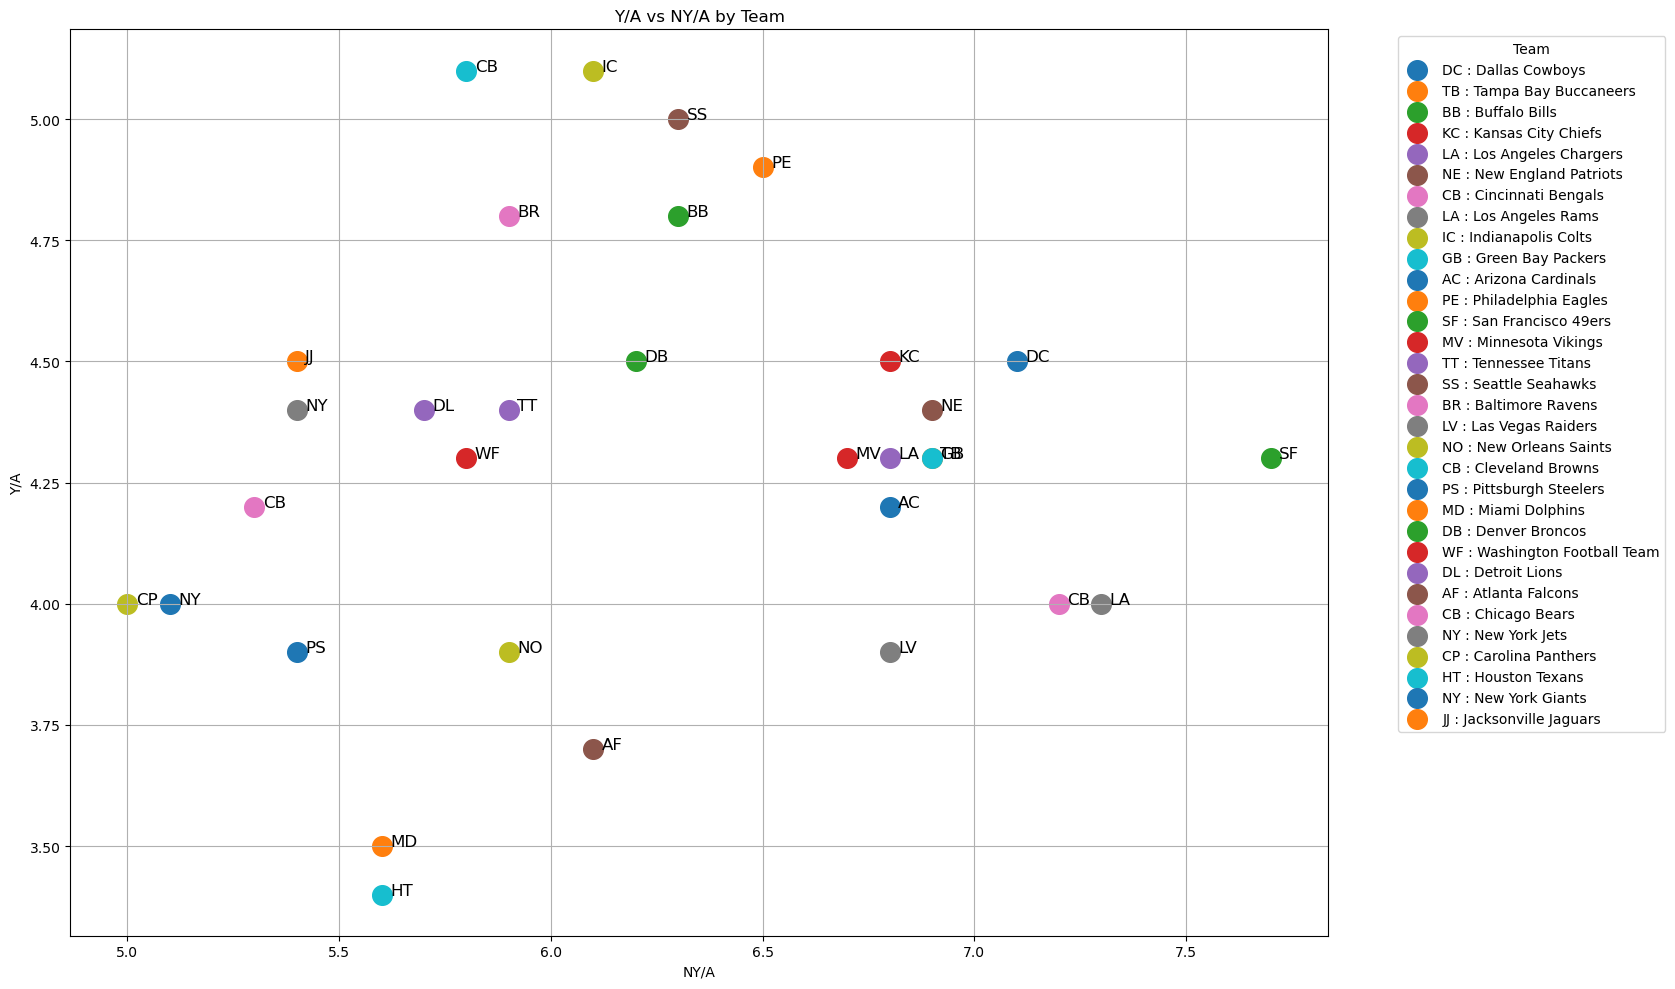

In [34]:
plot_passing_rushing(nfl2021_f)

In [35]:
nfl2021

,Rk,Tm,G,PF,Yds,Ply,Y/P,TO,FL,1stD,...,Yds.2,TD.1,Y/A,1stD.2,Pen,Yds.3,1stPy,Sc%,TO%,EXP
0,1,Dallas Cowboys,17,31.2,407.0,67.8,6.0,1.18,0.53,22.9,...,124.6,0.88,4.5,6.53,7.47,64.9,1.82,43.8,9.9,9.30
1,2,Tampa Bay Buccaneers,17,30.1,405.9,67.0,6.1,1.12,0.41,23.8,...,98.4,1.06,4.3,6.24,5.71,51.4,1.47,44.3,9.8,12.70
2,3,Buffalo Bills,17,28.4,381.9,67.2,5.7,1.29,0.35,23.4,...,129.9,1.18,4.8,7.88,6.65,57.6,1.65,45.2,11.3,12.70
3,4,Kansas City Chiefs,17,28.2,396.8,66.7,5.9,1.47,0.71,24.6,...,115.0,0.94,4.5,7.00,6.53,54.4,1.94,48.2,13.7,15.40
4,5,Los Angeles Chargers,17,27.9,390.2,66.4,5.9,1.29,0.41,23.6,...,107.9,1.06,4.3,6.59,6.82,60.8,1.94,45.7,12.0,9.70
5,6,New England Patriots,17,27.2,353.4,61.9,5.7,1.35,0.59,21.3,...,126.5,1.41,4.4,8.18,5.59,50.2,2.12,48.0,12.6,7.47
6,7,Cincinnati Bengals,17,27.1,361.5,61.5,5.9,1.24,0.41,19.8,...,102.5,0.94,4.0,5.65,4.24,36.5,1.94,42.6,10.0,6.97
7,8,Los Angeles Rams,17,27.1,372.1,62.2,6.0,1.35,0.29,20.9,...,99.0,0.59,4.0,5.82,4.47,37.5,1.35,45.9,12.2,9.50
8,9,Indianapolis Colts,17,26.5,347.1,61.9,5.6,1.12,0.65,20.8,...,149.4,1.29,5.1,9.06,4.47,40.5,1.94,43.3,8.9,7.47
9,10,Green Bay Packers,17,26.5,365.6,63.1,5.8,0.76,0.35,22.1,...,111.8,0.76,4.3,6.41,4.06,39.9,1.82,44.5,6.4,10.60


In [53]:
def plot_passing_rushing(df):
#     def get_second_word(team_name):
#         words = team_name.split()
#         return words[0]  # If there's only one word, return it

#     # Assuming df is your DataFrame
#     # df = pd.DataFrame({'Tm': [...], 'NY/A': [...], 'Y/A': [...})

#     # Set the figure size
#     plt.figure(figsize=(20, 10))

#     # Create a dictionary to map full team names to their second word
#     team_labels = {team: get_second_word(team) for team in df['Tm'].unique()}

#     # Create a scatter plot with larger dots
#     for team in df['Tm'].unique():
#         team_data = df[df['Tm'] == team]
#         second_word = team_labels[team]
#         plt.scatter(team_data['NY/A'], team_data['Y/A'], label=second_word, s=200)  # Custom legend label

#         # Add text labels with the second word for each point
#         for i in range(team_data.shape[0]):
#             plt.text(team_data['NY/A'].iloc[i] + 0.02, team_data['Y/A'].iloc[i], 
#                      second_word, fontsize=12)

#     # Add labels and title
#     plt.xlabel('NY/A')
#     plt.ylabel('Y/A')
#     plt.title('Y/A vs NY/A by Team')
#     plt.grid(True)

#     # Position the legend outside the plot with custom labels
#     plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for the legend

#     # Show the plot
#     plt.show()
    def get_second_word(team_name):
        words = team_name.split()
        if len(words) > 1:
            return words[1]
        return words[0]  # If there's only one word, return it

    # Add a new column to the DataFrame for the second word
    df['Second_Word'] = df['Tm'].apply(get_second_word)

    # Create the interactive scatter plot
    fig = px.scatter(df, 
                     x='NY/A', 
                     y='Y/A', 
                     text='Second_Word',  # Display the second word next to the point
                     hover_name='Tm',  # Display the full team name on hover
                     title='Y/A vs NY/A by Team',
                     labels={'NY/A': 'NY/A', 'Y/A': 'Y/A'},
                     width=1000, 
                     height=600)

    # Update layout to show text labels on the plot
    fig.update_traces(textposition='top center')

    # Show the plot
    fig.show()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



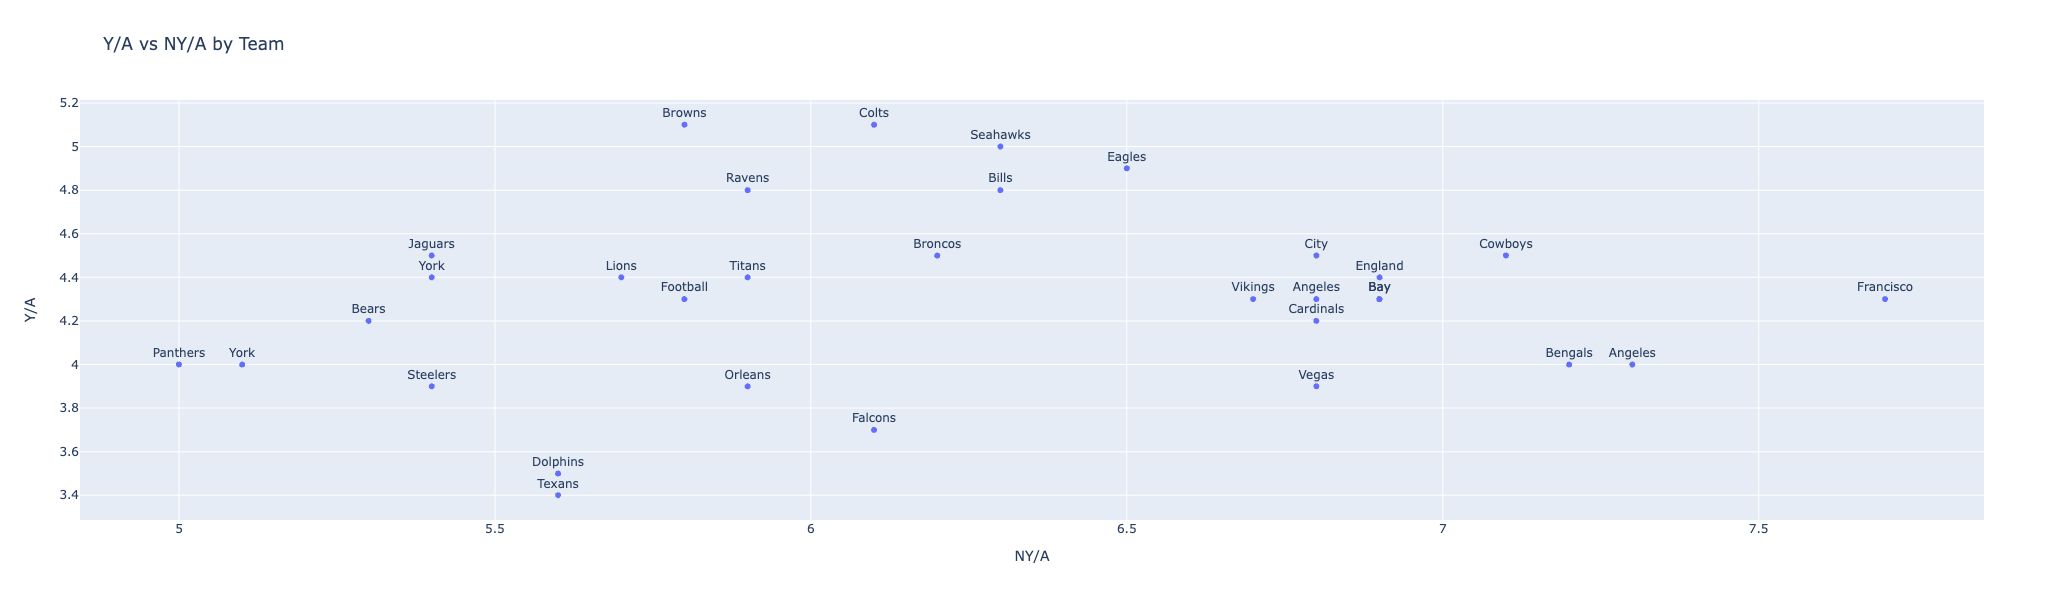

In [54]:
plot_passing_rushing(nfl2021_f)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/home/jupyterlab/conda/envs/python/lib/python3.7/site-pack

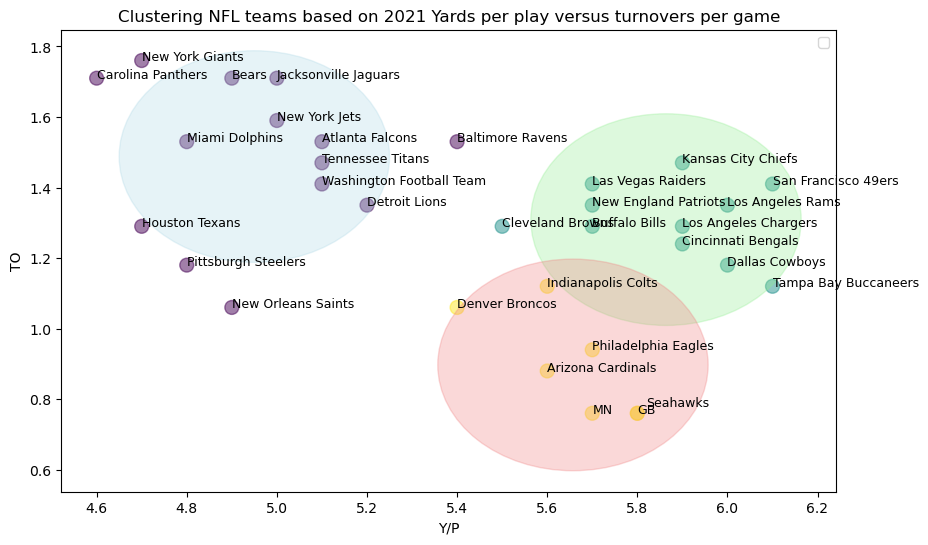

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/home/jupyterlab/conda/envs/python/lib/python3.7/site-pack

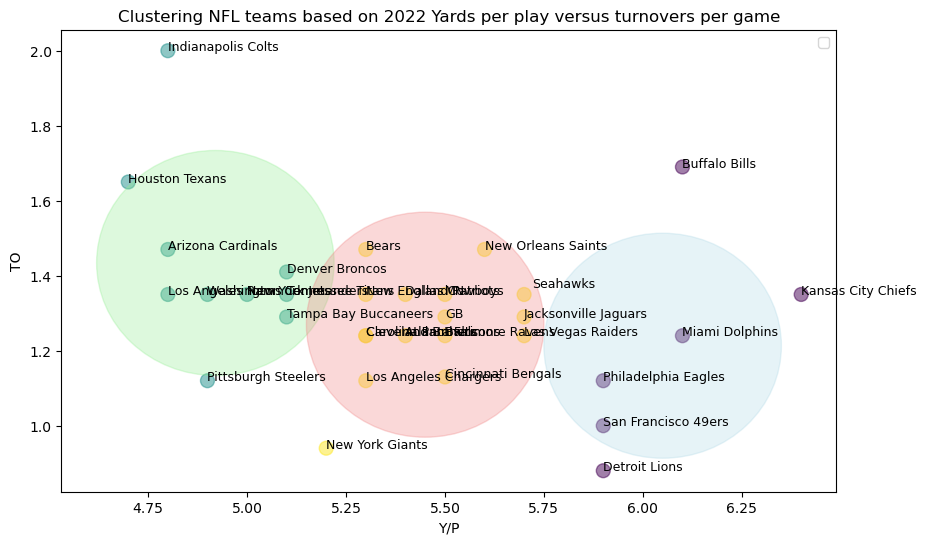

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/home/jupyterlab/conda/envs/python/lib/python3.7/site-pack

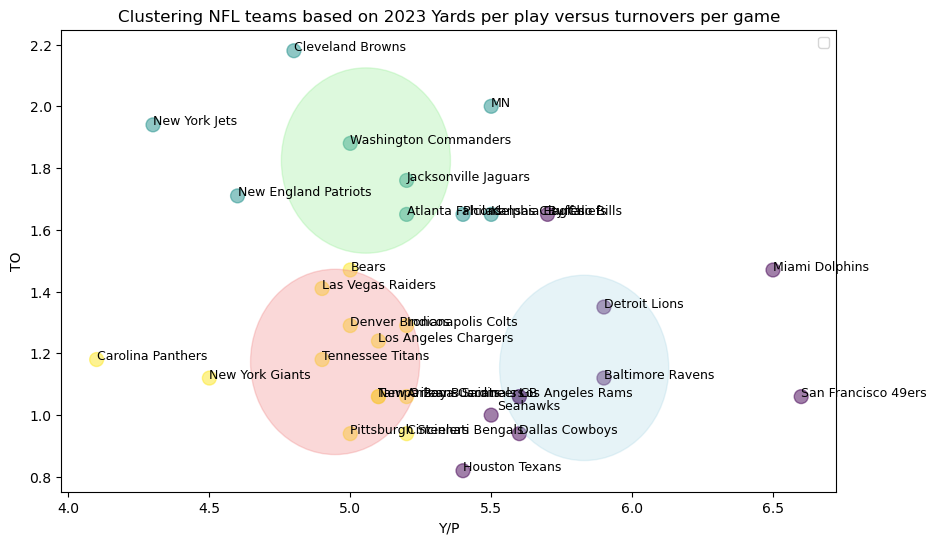

In [87]:
def plotData(df, year):
    import pandas as pd
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches

    # df = nfl2021

    # Selecting features for clustering
    X = df[['Y/P', 'TO']]  # Replace with relevant columns

    # Initialize KMeans with a chosen number of clusters (k)
    kmeans = KMeans(n_clusters=3, random_state=0)

    # Fit the model to your data
    kmeans.fit(X)

    # Predict the cluster for each data point
    df['Cluster'] = kmeans.predict(X)

    # Centroids of the clusters
    centroids = kmeans.cluster_centers_

    # Plotting the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Y/P'], df['TO'], c=df['Cluster'], cmap='viridis', marker='o', s=100, alpha=0.5)
    # plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
    for i, row in df.iterrows():
        if row['Tm'] == 'Minnesota Vikings':
            plt.text(row['Y/P'], row['TO'], 'MN', fontsize=9)
        elif row['Tm'] == 'Green Bay Packers':
            plt.text(row['Y/P'], row['TO'], 'GB', fontsize=9)
        elif row['Tm'] == 'Chicago Bears':
            plt.text(row['Y/P'], row['TO'], 'Bears', fontsize=9)
        elif row['Tm'] == 'Seattle Seahawks':
            plt.text(row['Y/P'] + 0.02, row['TO'] + 0.02, 'Seahawks', fontsize=9)
        else:
            plt.text(row['Y/P'], row['TO'], row['Tm'], fontsize=9)

    # Adding circles around centroids
    colors = ['lightblue', 'lightgreen', 'lightcoral']  # Different colors for each cluster
    radii = [0.3,0.3,0.3]  # Adjust radii to reasonably include most data points

    for i, (centroid, radius) in enumerate(zip(centroids, radii)):
        circle = patches.Circle(centroid[:2], radius, color=colors[i], alpha=0.3)
        plt.gca().add_patch(circle)

    plt.xlabel('Y/P')
    plt.ylabel('TO')
    plt.title('Clustering NFL teams based on ' + year + ' Yards per play versus turnovers per game')
    plt.legend()
    plt.show()

plotData(nfl2021, '2021')
plotData(nfl2022, '2022')
plotData(nfl2023, '2023')

In [83]:
centroids

array([[4.95      , 1.48785714],
       [5.86363636, 1.30909091],
       [5.65714286, 0.89714286]])